In [2]:
pip install tensorflow

     -------------------------------------- 276.5/276.5 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 11.8 MB/s eta 0:00:00
     -------------------------------------- 440.8/440.8 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.8 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 7.9 MB/s eta 0:00:00
     -------------------------------------- 430.4/430.4 kB 8.9 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ------------------------------------- 181.8/181.8 kB 11.4 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.

In [3]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [6]:
#importing the dataset

df = pd.read_csv('Tesla.csv - Tesla.csv.csv')
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [10]:
df.shape

(1692, 7)

In [14]:
df1 = df.reset_index()['Open']
df1.shape

(1692,)

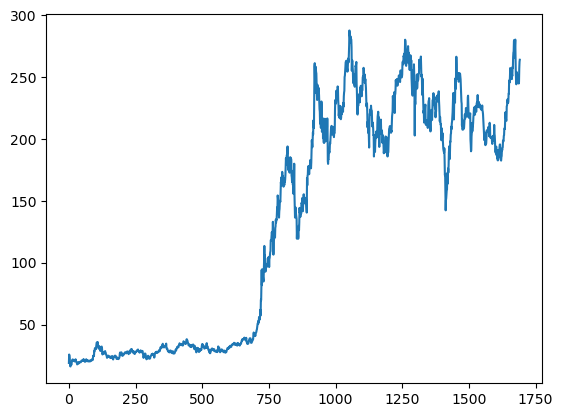

In [12]:
#displaying how the close values are distributed
plt.plot(df['Open'])

In [15]:
#displaying how the close values are distributed
plt.plot(df['Open'])

In [16]:
#it has now transformed into an array containing values between 0 and 1
print(df1)

[[0.01053291]
 [0.03553936]
 [0.03262991]
 ...
 [0.88704743]
 [0.90693471]
 [0.91282727]]


Preprocessing Data

In [17]:
train_len = int(len(df1)*0.65)        #65% of dataset is used as training dataset
test_len = int(len(df1)-train_len)    #rest of dataset is used as testing dataset


train_data = df1[0:train_len:]
test_data = df1[train_len:len(df1):1]

In [18]:
train_len,test_len

(1099, 593)

In [19]:
len(train_data),len(test_data)

(1099, 593)

In [20]:
#convert array of values into a dataset matrix
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step - 1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX),np.array(dataY)

In [21]:
time_step = 100
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [22]:
print(x_train.shape),print(y_train.shape)

(998, 100)
(998,)


(None, None)

In [23]:
print(x_test.shape),print(y_test.shape)

(492, 100)
(492,)


(None, None)

Creating a stacked LSTM Model

In [24]:
#reshaping the x_train and x_test data into 3-Dimension

#reshpae input to be [sample, time steps, features] which is required for LSTM

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)    #The last '1' with comma makes it 3-D
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [25]:
#Creating a stacked LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=50, batch_size=64, verbose=1)

Epoch 1/50
16/16 [==============================] - 25s 647ms/step - loss: 0.0315 - val_loss: 0.0525
Epoch 2/50
16/16 [==============================] - 7s 452ms/step - loss: 0.0056 - val_loss: 0.0130
Epoch 3/50
16/16 [==============================] - 7s 447ms/step - loss: 0.0030 - val_loss: 0.0042
Epoch 4/50
16/16 [==============================] - 6s 390ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 5/50
16/16 [==============================] - 7s 455ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 6/50
16/16 [==============================] - 6s 385ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 7/50
16/16 [==============================] - 7s 443ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 8/50
16/16 [==============================] - 6s 406ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 9/50
16/16 [==============================] - 7s 416ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 10/50
16/16 [==============================] - 7s 438ms/step - loss: 0.0017 - val_loss: 0.003

In [28]:
#predicting and checking performance metrics

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

16/16 [==============================] - 1s 70ms/step


In [29]:
#transform back to original form
#because the data we have scaled down needs to be get in original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error

In [31]:
#calculate RMSE performance metrics for train data

math.sqrt(mean_squared_error(y_train,train_predict))

123.55953767418947

In [32]:
#test data RMSE

math.sqrt(mean_squared_error(y_test,test_predict))

230.93663810875793

Plotting the prediction

In [33]:
#shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, : ] = train_predict

In [34]:
#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1 : len(df1)-1, : ] = test_predict

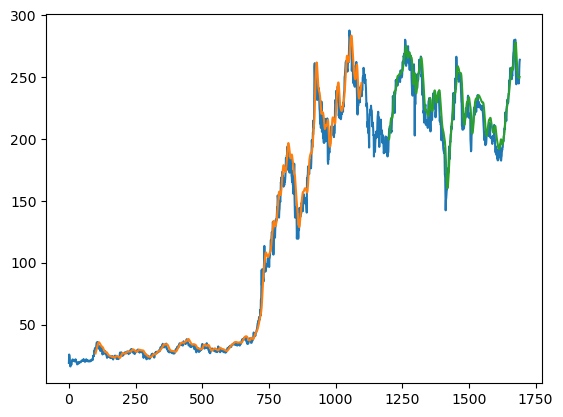

In [35]:
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

593

In [37]:
#Last date of our data is 22/6. To predict for 23/6 we need to study previous 100 days data (assume)

440-100

340

In [38]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 253)

In [40]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.7561963371017982,
 0.7842963798469808,
 0.8072772279236873,
 0.8141641682381381,
 0.796339206906239,
 0.7352410035967515,
 0.7935402750725008,
 0.7872057930214668,
 0.8063565193938377,
 0.7851802232072953,
 0.8422273458137854,
 0.8580266784061669,
 0.8262806667111209,
 0.8758884459822551,
 0.921850256303526,
 0.8999373490990944,
 0.864950424964807,
 0.859426173785709,
 0.8557801495933337,
 0.8723160932036044,
 0.8660920961761523,
 0.8694802962003308,
 0.8727580148837616,
 0.8474937728246866,
 0.8575479467989863,
 0.8571796412900416,
 0.8723529031306277,
 0.868817411838678,
 0.8713953846737547,
 0.8607151878245033,
 0.8544175157004926,
 0.8299635008305196,
 0.8147165712590432,
 0.7886789045722217,
 0.7819393696933996,
 0.7171582733391675,
 0.7350200409152559,
 0.7049312935254369,
 0.705078581110374,
 0.7192575145670635,
 0.7057783306415621,
 0.707140960851569,
 0.710455544704535,
 0.7108237949709677,
 0.7272860671675139,
 0.7396972549782286,
 0.7503037804137556,
 0.7382609533544973,


Prediction for next 30 days

In [53]:
lst_output = []
steps = 252 
i = 0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1,steps,1)
        yhat = model.predict(x_input,verbose = 0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape(1,steps,1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
        
print(lst_output)

0 day input [0.78429638 0.80727723 0.81416417 0.79633921 0.735241   0.79354028
 0.78720579 0.80635652 0.78518022 0.84222735 0.85802668 0.82628067
 0.87588845 0.92185026 0.89993735 0.86495042 0.85942617 0.85578015
 0.87231609 0.8660921  0.8694803  0.87275801 0.84749377 0.85754795
 0.85717964 0.8723529  0.86881741 0.87139538 0.86071519 0.85441752
 0.8299635  0.81471657 0.7886789  0.78193937 0.71715827 0.73502004
 0.70493129 0.70507858 0.71925751 0.70577833 0.70714096 0.71045554
 0.71082379 0.72728607 0.73969725 0.75030378 0.73826095 0.74308546
 0.75262398 0.76915993 0.76197836 0.75623315 0.74927259 0.75078257
 0.7434169  0.75903213 0.80160569 0.80595141 0.77799871 0.74894115
 0.74665781 0.73954991 0.74128085 0.74271715 0.74894115 0.75328687
 0.67517399 0.66125288 0.6404817  0.64346478 0.68408644 0.69601884
 0.72489225 0.69973848 0.71295985 0.71395423 0.72537103 0.74268034
 0.75063528 0.76588221 0.77103815 0.76227299 0.76006332 0.74945674
 0.76919674 0.77461051 0.77287957 0.75811143 0.759

In [54]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [55]:
len(df1)

1692

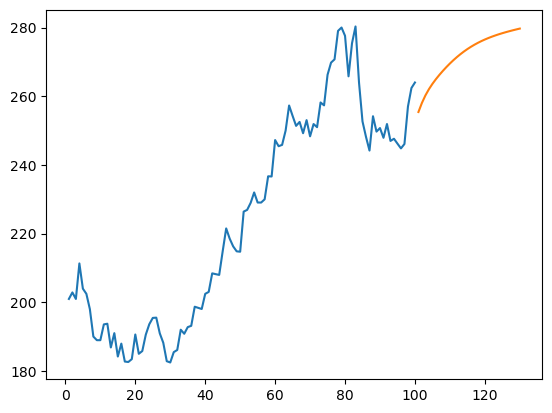

In [58]:
plt.plot(day_new,scaler.inverse_transform(df1[1592:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

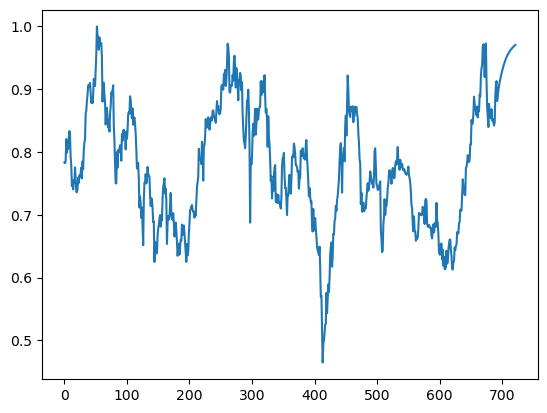

In [59]:
#combined data plotted with prediction
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])